In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

In [2]:
data = pd.read_csv('./israel_attractions.tsv', sep='\t')

In [3]:
# Num of attraction grouped by type - general data 
print(data['Kind'].nunique())
data.groupby(['Kind'])['Id'].count()

10


Kind
ארכיאולוגיה והיסטוריה    123
אתרים לאומיים             16
חופים                    119
טבע ובעלי חיים            97
יקבים                     17
מוזיאונים ותרבות          44
מקומות קדושים             70
ספורט אתגרי               19
פארקים וגנים              64
שעשועים והרפתקאות         15
Name: Id, dtype: int64

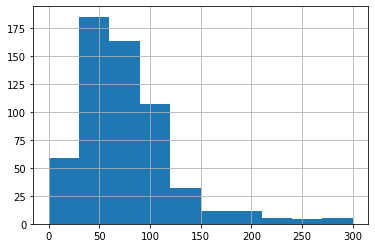

In [4]:
# Histogram of Words in Censored Desc

def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist(range=(0,300))

plot_word_number_histogram(data["Censored_Desc"])

In [5]:
# Split data to train and test
split_data = pd.read_csv('./israel_attractions.tsv', sep='\t')

y = split_data.pop("Kind")
X = split_data

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [6]:
# Get stopwords

def get_hebrew_stopwords():
    stop_path="./data/heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
        print(res[:4])
    return res

def invert_words(words):
    return [w[::-1] for w in words]

stop=get_hebrew_stopwords()

# Add more common words that can influence the data
specific_common_words = ['מצונזר', 'לתמונה', 'קרדיט', 'שבו', 'פיקיוויקי', 'צלם', 'ידי', 'פיקיויקי', 'פי', 'וכן']
stop += specific_common_words

['את', 'לא', 'של', 'אני']


In [7]:
def plot_top_non_stopwords_barchart(text, stop):
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (len(word)>1 and word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=invert_words(x))

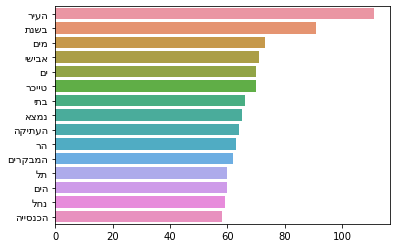

In [8]:
# Common words without stopwords and irrelevant words
plot_top_non_stopwords_barchart(data["Censored_Desc"], stop)

In [9]:
# Get all kinds
kinds = y_train["Kind"].unique()
print(kinds)
X_train.loc[:, "Kind"]=y_train

['חופים' 'פארקים וגנים' 'ארכיאולוגיה והיסטוריה' 'מקומות קדושים'
 'טבע ובעלי חיים' 'שעשועים והרפתקאות' 'מוזיאונים ותרבות' 'ספורט אתגרי'
 'יקבים' 'אתרים לאומיים']
D:\Users\yelfs\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\yelfs\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] =

In [10]:
# Num of Attraction group by type - Train data
print(X_train['Kind'].nunique())
X_train.groupby(['Kind'])['Id'].count()

10


Kind
ארכיאולוגיה והיסטוריה    95
אתרים לאומיים             9
חופים                    91
טבע ובעלי חיים           83
יקבים                    11
מוזיאונים ותרבות         38
מקומות קדושים            58
ספורט אתגרי              16
פארקים וגנים             55
שעשועים והרפתקאות        11
Name: Id, dtype: int64

חופים


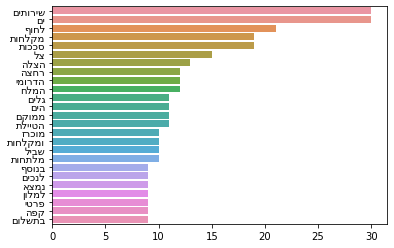

In [11]:
# Top words without stopwords and irrelevant words in חופים train data
print(kinds[0])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[0]]["Censored_Desc"], stop)

פארקים וגנים


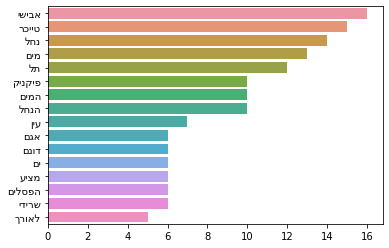

In [12]:
# Top words without stopwords and irrelevant words in פארקים וגנים train data
print(kinds[1])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[1]]["Censored_Desc"], stop)

ארכיאולוגיה והיסטוריה


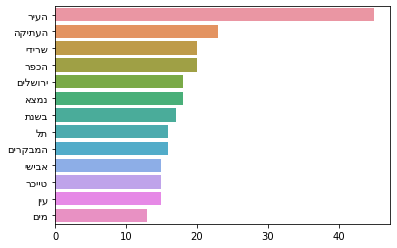

In [13]:
# Top words without stopwords and irrelevant words in ארכיאולוגיה והיסטוריה train data
print(kinds[2])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[2]]["Censored_Desc"], stop)

מקומות קדושים


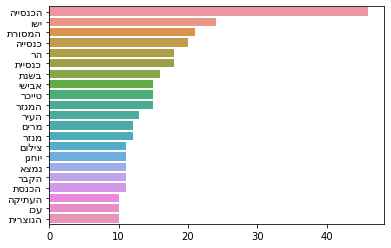

In [14]:
# Top words without stopwords and irrelevant words in מקומות קדושים train data
print(kinds[3])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[3]]["Censored_Desc"], stop)

טבע ובעלי חיים


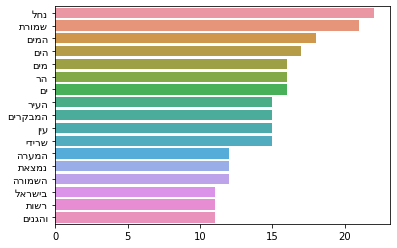

In [15]:
# Top words without stopwords and irrelevant words in טבע ובעלי חיים train data
print(kinds[4])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[4]]["Censored_Desc"], stop)

שעשועים והרפתקאות


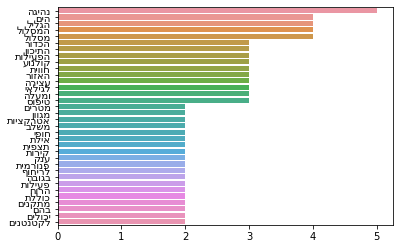

In [16]:
# Top words without stopwords and irrelevant words in שעשועים והרפתקאות train data
print(kinds[5])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[5]]["Censored_Desc"], stop)

מוזיאונים ותרבות


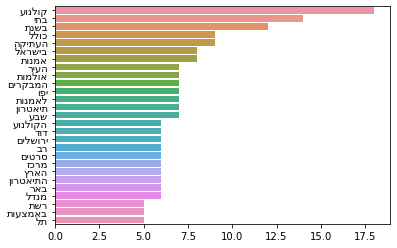

In [17]:
# Top words without stopwords and irrelevant words in מוזיאונים ותרבות train data
print(kinds[6])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[6]]["Censored_Desc"], stop)

ספורט אתגרי


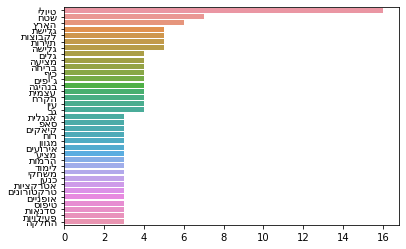

In [18]:
# Top words without stopwords and irrelevant words in ספורט אתגרי train data
print(kinds[7])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[7]]["Censored_Desc"], stop)

יקבים


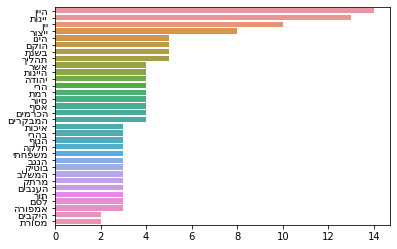

In [19]:
# Top words without stopwords and irrelevant words in יקבים train data
print(kinds[8])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[8]]["Censored_Desc"], stop)

אתרים לאומיים


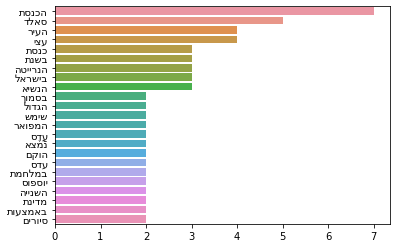

In [20]:
# Top words without stopwords and irrelevant words in אתרים לאומיים train data
print(kinds[9])
plot_top_non_stopwords_barchart(X_train[X_train["Kind"]==kinds[9]]["Censored_Desc"], stop)

In [21]:
# Data Makeup - Category and it's percentage
(data.groupby(['Kind'])['Id'].count()/584)*100

Kind
ארכיאולוגיה והיסטוריה    21.061644
אתרים לאומיים             2.739726
חופים                    20.376712
טבע ובעלי חיים           16.609589
יקבים                     2.910959
מוזיאונים ותרבות          7.534247
מקומות קדושים            11.986301
ספורט אתגרי               3.253425
פארקים וגנים             10.958904
שעשועים והרפתקאות         2.568493
Name: Id, dtype: float64

In [22]:
# Modify y_test shape to fit evaluator
y_test.loc[:,"Censored_Desc"]=X_test["Censored_Desc"]
y_test = y_test.rename(columns={"Kind": "label"})


In [23]:
from evaluate import Evaluator
evaluator=Evaluator(y_test)

test_df has 117 rows


In [24]:
def get_strongest_words(label, pipe):
    cur_coef=pipe["algo"].coef_[label]
    word_df=pd.DataFrame({"val":cur_coef}).reset_index().sort_values(["val"],ascending=[False])
    word_df.loc[:, "word"]=word_df["index"].apply(lambda v:inverse_dict[v])
    print(word_df.head(10))

In [25]:
# Run random forest classifier 
count_vectorizer=CountVectorizer(stop_words=stop)
transformer=TfidfTransformer()
algo = RandomForestClassifier()
pipe = Pipeline([('vectorizer', count_vectorizer),
                 ('algo', algo)])
pipe.fit(X_train["Censored_Desc"], y_train["Kind"])
predicted = pipe.predict(X_test["Censored_Desc"])
evaluator.evaluate(predicted)

Micro precision:0.5982905982905983, recall:0.5982905982905983, f1:0.5982905982905983
Macro precision:0.4950065641410353, recall:0.4412698412698412, f1:0.45196107823107096
Accuracy: 0.5982905982905983
[[21  0  0  5  0  0  2  0  0  0]
 [ 4  0  0  1  0  1  0  0  1  0]
 [ 3  0 24  1  0  0  0  0  0  0]
 [ 2  0  3  7  0  0  1  0  1  0]
 [ 3  0  0  0  3  0  0  0  0  0]
 [ 2  0  0  1  0  3  0  0  0  0]
 [ 3  0  0  0  0  0  9  0  0  0]
 [ 0  0  1  1  0  0  0  1  0  0]
 [ 5  0  2  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  1  0  1  1  0]]
LABEL:  ארכיאולוגיה והיסטוריה F1:  0.5915492957746479  PREC:  0.4883720930232558  REC:  0.75
LABEL:  אתרים לאומיים F1:  0.0  PREC:  0.0  REC:  0.0
LABEL:  חופים F1:  0.8135593220338982  PREC:  0.7741935483870968  REC:  0.8571428571428571
LABEL:  טבע ובעלי חיים F1:  0.4666666666666667  PREC:  0.4375  REC:  0.5
LABEL:  יקבים F1:  0.6666666666666666  PREC:  1.0  REC:  0.5
LABEL:  מוזיאונים ותרבות F1:  0.5454545454545454  PREC:  0.6  REC:  0.5
LABEL:  מקומות קדושים F1:

In [26]:
# Run Logistic Regression Classifier

count_vectorizer=CountVectorizer(stop_words=stop)
transformer=TfidfTransformer()
algo=LogisticRegression()
pipe = Pipeline([('vectorizer', count_vectorizer),
                 ('algo', algo)])
pipe.fit(X_train["Censored_Desc"], y_train["Kind"])
predicted = pipe.predict(X_test["Censored_Desc"])
evaluator.evaluate(predicted)

Micro precision:0.6239316239316239, recall:0.6239316239316239, f1:0.6239316239316239
Macro precision:0.4441639243109831, recall:0.4226190476190476, f1:0.4126740918992201
Accuracy: 0.6239316239316239
[[22  0  0  4  0  0  2  0  0  0]
 [ 3  0  1  1  0  0  0  0  2  0]
 [ 1  0 27  0  0  0  0  0  0  0]
 [ 1  0  1  9  0  0  1  0  2  0]
 [ 0  0  3  2  0  1  0  0  0  0]
 [ 2  0  0  1  0  3  0  0  0  0]
 [ 3  0  1  0  0  0  8  0  0  0]
 [ 0  0  1  1  0  0  0  1  0  0]
 [ 2  0  3  0  0  1  0  0  3  0]
 [ 0  0  2  0  0  1  0  0  1  0]]
LABEL:  ארכיאולוגיה והיסטוריה F1:  0.7096774193548386  PREC:  0.6470588235294118  REC:  0.7857142857142857
LABEL:  אתרים לאומיים F1:  0.0  PREC:  0.0  REC:  0.0
LABEL:  חופים F1:  0.8059701492537313  PREC:  0.6923076923076923  REC:  0.9642857142857143
LABEL:  טבע ובעלי חיים F1:  0.5625000000000001  PREC:  0.5  REC:  0.6428571428571429
LABEL:  יקבים F1:  0.0  PREC:  0.0  REC:  0.0
LABEL:  מוזיאונים ותרבות F1:  0.5  PREC:  0.5  REC:  0.5
LABEL:  מקומות קדושים F1:  0.6

# Answers


# Logistic Regression: we can see that the categories with the smallest data-set are the worse to be classified:
# אתרים לאומיים
# יקבים
# שעשועים והרפתקאות
# And the categories which are most common to confuse with are: 
# ארכיאולוגיה והיסטוריה
# חופים
# This is because these data-sets are larger.
# That is explained also by the high Micro precision compared to its Macro precision

# For example:
# אתרים לאומיים
#  With Precision 0, is due to the common words it has with other categories (this category is king of more generic) and of course due it’s small data- set.
#  We can see that a common word in this category and also in:
#  ארכיאולוגיה והיסטוריה
# Is:
# בשנת
# These king of words that are in common and in particular with big categories make the algorithm to make mistakes.



# Random Forest: we can see that the most generic categories (it means share words with other categories)  are the worse to be classified:
# אתרים לאומיים
# שעשועים והרפתקאות
# And the category which is the most common to confuse with is: 
# ארכיאולוגיה והיסטוריה

# This is because the data-set is larger and contains more words and more common words with other categories.

# This can be explained also by the high Macro precision compared to the previous algorithm

# For example:
# שעשועים והרפתקאות
# With Precision 0, is due to the common words it has with other categories (this category is kind of more generic) and of course due it’s small data- set.

In [28]:
# Answer for question 8

inverse_dict={count_vectorizer.vocabulary_[w]:w for w in count_vectorizer.vocabulary_.keys()}
labels = [
    "ארכיאולוגיה והיסטוריה",
    "אתרים לאומיים",
    "חופים",
    "טבע ובעלי חיים",
    "יקבים",
    "מוזיאונים ותרבות",
    "מקומות קדושים",
    "ספורט אתגרי",
    "פארקים וגנים",
    "שעשועים והרפתקאות"
]
for index, label in enumerate(labels):
    print("========================")
    print("        " + label + "      ")
    get_strongest_words(index, pipe)

        ארכיאולוגיה והיסטוריה      
      index       val     word
3268   3268  0.504866     העיר
2447   2447  0.419226   הייטנר
9284   9284  0.419226    שאולה
2414   2414  0.416308   היהודי
2554   2554  0.381701     הכפר
3310   3310  0.378747   העתיקה
1054   1054  0.370773     במאה
5637   5637  0.355611  ירושלים
9317   9317  0.353902      שבה
3573   3573  0.349170    הרובע
        אתרים לאומיים      
      index       val      word
5812   5812  0.517276      כנסת
6715   6715  0.511411     מאבני
2550   2550  0.410302     הכנסת
8252   8252  0.319631      סאלד
6261   6261  0.305865   ליחידים
6966   6966  0.302509   מודרכים
7925   7925  0.299969  מתקיימים
8320   8320  0.288512    סיורים
954     954  0.278145     בימים
0         0  0.264163        00
        חופים      
      index       val     word
9634   9634  0.875758  שירותים
6194   6194  0.680069     לחוף
5566   5566  0.667524       ים
8772   8772  0.586723     פרטי
6985   6985  0.510227    מוכרז
8343   8343  0.508849    סככות
7659  

# Answer to question 9

# Logistic Regression has a bigger f1 in micro precision.
# and Random Forest has a bigger f1 in macro precision